<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_03_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

### **<font color='orange'> Phase 2. 분석단계**

In [1]:
# prompt: import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [3]:
import pandas as pd
df = pd.read_pickle(path).sample(frac=0.1)
df

,일자,본문
12715,2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문..."
21503,2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...
1050,2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...
1412,2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...
8957,2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...
...,...,...
14291,2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...
14330,2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...
27517,2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능..."
12070,2024-10-08,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...


In [4]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 21.8 MB/s eta 0:00:00


In [5]:
from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_single_article(article): # Define a function for single articles
    clean_article = re.sub(r'[^\w\s]', '', str(article))
    nouns = okt.nouns(clean_article)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
    return filtered_nouns

df['추출단어'] = df['본문'].apply(extract_words_from_single_article)
df

,일자,본문,추출단어
12715,2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문...","[연구원, 위원, 한국, 한강, 기적, 원동력, 산업, 부문, 무엇, 세대, 핸드폰..."
21503,2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...,"[카카오, 모빌리티, 민족, 명절, 추석, 연휴, 기간, 무료, 개방, 주차장, 안..."
1050,2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...,"[이투데이, 세종, 병곤, 기자, 홍문표, 한국, 농수산, 식품, 유통, 공사, 신..."
1412,2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...,"[서울, 세계, 불꽃, 축제, 여의도, 한강, 일대, 전망, 서울, 세계, 불꽃, ..."
8957,2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...,"[소설가, 한강, 노벨문학상, 수상, 쾌거, 국내, 출판사, 주가, 광폭, 날개, ..."
...,...,...,...
14291,2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...,"[서울, 용산구, 중소기업, 기금, 활용, 하반기, 중소기업, 소상, 공인, 융자,..."
14330,2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...,"[전화, 인터뷰, 영상, 공개, 한국인, 최초, 노벨문학상, 수상한, 소설가, 한강..."
27517,2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능...","[올해, 노벨문학상, 발표, 가운데, 해외, 베팅, 사이트, 분석, 인공, 지능, ..."
12070,2024-10-08,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리..."


In [6]:
# Join the list of words into a single string for each document
df['추출단어_str'] = df['추출단어'].apply(lambda x: ' '.join(x))
# 인덱스 생성
df.index = range(len(df))
df

,일자,본문,추출단어,추출단어_str
0,2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문...","[연구원, 위원, 한국, 한강, 기적, 원동력, 산업, 부문, 무엇, 세대, 핸드폰...",연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 ...
1,2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...,"[카카오, 모빌리티, 민족, 명절, 추석, 연휴, 기간, 무료, 개방, 주차장, 안...",카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 ...
2,2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...,"[이투데이, 세종, 병곤, 기자, 홍문표, 한국, 농수산, 식품, 유통, 공사, 신...",이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 ...
3,2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...,"[서울, 세계, 불꽃, 축제, 여의도, 한강, 일대, 전망, 서울, 세계, 불꽃, ...",서울 세계 불꽃 축제 여의도 한강 일대 전망 서울 세계 불꽃 축제 여의도 한강 공원...
4,2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...,"[소설가, 한강, 노벨문학상, 수상, 쾌거, 국내, 출판사, 주가, 광폭, 날개, ...",소설가 한강 노벨문학상 수상 쾌거 국내 출판사 주가 광폭 날개 증권 업계 초반 국내...
...,...,...,...,...
1776,2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...,"[서울, 용산구, 중소기업, 기금, 활용, 하반기, 중소기업, 소상, 공인, 융자,...",서울 용산구 중소기업 기금 활용 하반기 중소기업 소상 공인 융자 지원 용산구 하반기...
1777,2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...,"[전화, 인터뷰, 영상, 공개, 한국인, 최초, 노벨문학상, 수상한, 소설가, 한강...",전화 인터뷰 영상 공개 한국인 최초 노벨문학상 수상한 소설가 한강 매우 영광 수상소...
1778,2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능...","[올해, 노벨문학상, 발표, 가운데, 해외, 베팅, 사이트, 분석, 인공, 지능, ...",올해 노벨문학상 발표 가운데 해외 베팅 사이트 분석 인공 지능 중국 작가 찬쉐사진 ...
1779,2024-10-08,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...


### **Corpus 추출방법**
#### 2가지 방법

In [7]:
# prompt: 추출단어_str 를 리스트 corpus로 만들기
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html --> corpus와 같은 형태
#
corpus = df['추출단어_str'].tolist()
corpus[:10]

['연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 거슬러 석유화학 철강 시멘트 제지 산업 역할 한국 지금 모습 산업 장치 산업 기간산업 장치',
 '카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 카카오 내비 활용 공개 안정 내비게이션 서비스 제공 비상 대응 체계 마련 카카오 내비 연휴 기간 지자체 무료 개방 공영 주차장 정보 제공 주차 고민 이용자 카카오 내비 추석',
 '이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 발전 중추 역할 직원 그동안 경험 전문성 토대 국민 안정 먹거리 확보 향상 매진 사장 나주 본사 취임식',
 '서울 세계 불꽃 축제 여의도 한강 일대 전망 서울 세계 불꽃 축제 여의도 한강 공원 일대 오후 시작 진행 서울시 주최 사인 한화 비롯 소방 재난 본부 영등포 용산구 서울 경찰청 유관 기관 협력 행사 종합 안전 본부 설치 안전',
 '소설가 한강 노벨문학상 수상 쾌거 국내 출판사 주가 광폭 날개 증권 업계 초반 국내 출판사 주가 급등 오전 기준 예스 전날 오른 가격 밀리 서재 역시 초반 오른 상한 기록',
 '라디오 뉴스 이익선 최수영 이슈 피플 방송 일시 진행 이익선 최수영 출연자 김덕 커뮤니케이션 연구소장 아래 텍스트 실제 방송 내용 차이 내용 방송 확인 이익선 정치 뉴스 얘기',
 '이데일리 박지애 기자 단지 커뮤니티 아파트 가치 판가름 핵심 요소 차별 경쟁 더욱 한강 수자 오브 센트 스카이 라운지 사진 분양 시장 커뮤니티 여부 경쟁률 영향 분양 업계 대표 청약 래미안 가구 규모 중형',
 '서울 열대야 한강 반포대교 시민 무지개분수 더위 연합',
 '대구시 대구대학교 반도체 전문 인력 양성 대구시 산격청사 대구대 반도체 인재 양성 전용 캠퍼스 조성 내용 업무 협약 협약 단체 기념 촬영 왼쪽 김병삼 경북 경제 유구 역청 홍준표 대구시 박순진 대구대 총장 김경기 대구대 차세대 반도체',
 '머니투데이 더리더 보기 칼럼니스트 리더 

In [8]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus_other = extract_words_from_corpus(df)
print(f"Corpus created successfully with {len(corpus_other)} words")
corpus_other[:10]

Extracting words: 100%|██████████| 1781/1781 [00:20<00:00, 85.82it/s] 

Corpus created successfully with 62540 words


['연구원', '위원', '한국', '한강', '기적', '원동력', '산업', '부문', '무엇', '세대']

In [9]:
corpus[0][:40]

'연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 '

### **<font color='orange'> Phase 5. LDA 분석단계**

In [10]:
import gensim
from gensim import corpora
from pprint import pprint

In [11]:
# 텍스트 전처리 단계
# gensim.utils.simple_preprocess(text) :
# Gensim 라이브러리에서 제공하는 함수로, 입력 텍스트를 간단히 토큰화하고 소문자로 변환합니다. 구두점이나 특수문자는 자동으로 제거
def preprocess(text):
    return [word for word in gensim.utils.simple_preprocess(text) if word not in gensim.parsing.preprocessing.STOPWORDS]

# word not in gensim.parsing.preprocessing.STOPWORDS: 이 부분은 불용어(stopwords)를 제거하는 역할
# 불용어는 "그리고", "있다", "없다" 같은 분석에 큰 의미가 없는 단어들


# Corpus를 documents로
documents = df['추출단어_str'].tolist()
documents[:3]

['연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 거슬러 석유화학 철강 시멘트 제지 산업 역할 한국 지금 모습 산업 장치 산업 기간산업 장치',
 '카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 카카오 내비 활용 공개 안정 내비게이션 서비스 제공 비상 대응 체계 마련 카카오 내비 연휴 기간 지자체 무료 개방 공영 주차장 정보 제공 주차 고민 이용자 카카오 내비 추석',
 '이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 발전 중추 역할 직원 그동안 경험 전문성 토대 국민 안정 먹거리 확보 향상 매진 사장 나주 본사 취임식']

In [12]:

# 문서 전처리 (영어는 직접 문장을 입력하지만 한글이라 단어만 추출하고 입력--> 한글은 텍스트전처리작업이 필요)
processed_docs = [preprocess(doc) for doc in documents]
processed_docs[:3]

[['연구원',
  '위원',
  '한국',
  '한강',
  '기적',
  '원동력',
  '산업',
  '부문',
  '무엇',
  '세대',
  '핸드폰',
  '반도체',
  '그것',
  '이전',
  '거슬러',
  '석유화학',
  '철강',
  '시멘트',
  '제지',
  '산업',
  '역할',
  '한국',
  '지금',
  '모습',
  '산업',
  '장치',
  '산업',
  '기간산업',
  '장치'],
 ['카카오',
  '모빌리티',
  '민족',
  '명절',
  '추석',
  '연휴',
  '기간',
  '무료',
  '개방',
  '주차장',
  '안내',
  '선호',
  '경로',
  '옵션',
  '카카오',
  '내비',
  '활용',
  '공개',
  '안정',
  '내비게이션',
  '서비스',
  '제공',
  '비상',
  '대응',
  '체계',
  '마련',
  '카카오',
  '내비',
  '연휴',
  '기간',
  '지자체',
  '무료',
  '개방',
  '공영',
  '주차장',
  '정보',
  '제공',
  '주차',
  '고민',
  '이용자',
  '카카오',
  '내비',
  '추석'],
 ['이투데이',
  '세종',
  '병곤',
  '기자',
  '홍문표',
  '한국',
  '농수산',
  '식품',
  '유통',
  '공사',
  '신임',
  '사장',
  '국내',
  '농어',
  '발전',
  '중추',
  '역할',
  '직원',
  '그동안',
  '경험',
  '전문성',
  '토대',
  '국민',
  '안정',
  '먹거리',
  '확보',
  '향상',
  '매진',
  '사장',
  '나주',
  '본사',
  '취임식']]


### **Gensim 라이브러리를 사용하여 단어 집합(dictionary)을 생성하고, 이를 통해 말뭉치(corpus)를 만드는 과정**

- corpora.Dictionary(processed_docs): gensim.corpora.Dictionary를 사용하여 각 단어에 고유 ID를 부여하는 "단어 집합(Dictionary)"을 생성
- 데이터셋 내에 있는 모든 고유 단어들을 추출하고, 그 단어들에 인덱스 번호를 부여
- Dictionary 객체는 말 그대로 텍스트의 고유한 단어들을 모아놓은 사전 역할을 하며, 각 단어에 대한 ID와 해당 단어의 빈도를 관리

In [13]:

# 단어 집합 생성
dictionary = corpora.Dictionary(processed_docs)

# 말뭉치 생성
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 4),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1)]]

### doc2bow(doc):
- "Bag of Words (BoW)" 모델을 사용하여 문서를 벡터화
- BoW는 각 문서에서 단어가 몇 번 등장하는지를 빈도 수로 나타낸 것
- doc2bow 메서드는 입력된 문서(단어 리스트)에 대해 해당 단어가 얼마나 등장했는지 나타내는 튜플 (단어 ID, 빈도 수)의 리스트를 반환
= 예를 들어, 문서 내 특정 단어가 ID 1을 갖고 3번 등장하면 (1, 3) 형태로 표현

In [14]:
df['corpus'] = corpus
df

,일자,본문,추출단어,추출단어_str,corpus
0,2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문...","[연구원, 위원, 한국, 한강, 기적, 원동력, 산업, 부문, 무엇, 세대, 핸드폰...",연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 ...,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1..."
1,2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...,"[카카오, 모빌리티, 민족, 명절, 추석, 연휴, 기간, 무료, 개방, 주차장, 안...",카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 ...,"[(24, 2), (25, 1), (26, 1), (27, 1), (28, 1), ..."
2,2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...,"[이투데이, 세종, 병곤, 기자, 홍문표, 한국, 농수산, 식품, 유통, 공사, 신...",이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 ...,"[(12, 1), (22, 1), (42, 1), (55, 1), (56, 1), ..."
3,2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...,"[서울, 세계, 불꽃, 축제, 여의도, 한강, 일대, 전망, 서울, 세계, 불꽃, ...",서울 세계 불꽃 축제 여의도 한강 일대 전망 서울 세계 불꽃 축제 여의도 한강 공원...,"[(21, 2), (83, 1), (84, 1), (85, 1), (86, 2), ..."
4,2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...,"[소설가, 한강, 노벨문학상, 수상, 쾌거, 국내, 출판사, 주가, 광폭, 날개, ...",소설가 한강 노벨문학상 수상 쾌거 국내 출판사 주가 광폭 날개 증권 업계 초반 국내...,"[(21, 1), (57, 2), (112, 1), (113, 1), (114, 1..."
...,...,...,...,...,...
1776,2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...,"[서울, 용산구, 중소기업, 기금, 활용, 하반기, 중소기업, 소상, 공인, 융자,...",서울 용산구 중소기업 기금 활용 하반기 중소기업 소상 공인 융자 지원 용산구 하반기...,"[(54, 1), (90, 1), (100, 2), (159, 1), (268, 1..."
1777,2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...,"[전화, 인터뷰, 영상, 공개, 한국인, 최초, 노벨문학상, 수상한, 소설가, 한강...",전화 인터뷰 영상 공개 한국인 최초 노벨문학상 수상한 소설가 한강 매우 영광 수상소...,"[(21, 3), (27, 1), (118, 1), (122, 1), (123, 1..."
1778,2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능...","[올해, 노벨문학상, 발표, 가운데, 해외, 베팅, 사이트, 분석, 인공, 지능, ...",올해 노벨문학상 발표 가운데 해외 베팅 사이트 분석 인공 지능 중국 작가 찬쉐사진 ...,"[(60, 1), (118, 2), (219, 1), (255, 3), (266, ..."
1779,2024-10-08,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...,"[(22, 1), (46, 1), (60, 1), (159, 1), (223, 1)..."


In [15]:
# LDA 모델 학습
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=3,  # 추출할 주제 개수
                                   random_state=42,
                                   passes=10,
                                   # 학습 데이터인 corpus를 전체 모델 학습에서 10번 반복하여 모델에 입력합니다.
                                   # 더 많은 패스를 사용하면 모델이 문서의 주제를 더 잘 학습할 가능성이 있지만, 학습 시간이 더 오래 걸릴 수 있습
                                   iterations=100
                                   # 각 패스에서 모델이 최적의 매개변수를 찾기 위해 반복하는 횟수를 지정
                                   )

# 주제 출력
pprint(lda_model.print_topics())

[(0,
  '0.010*"서울" + 0.007*"기자" + 0.006*"빅데이터" + 0.006*"기업" + 0.005*"아파트" + '
  '0.005*"분석" + 0.005*"사업" + 0.004*"한강" + 0.004*"산업" + 0.004*"개최"'),
 (1,
  '0.023*"한강" + 0.010*"기자" + 0.008*"작가" + 0.007*"기업" + 0.007*"수상" + 0.007*"서울" '
  '+ 0.006*"한국" + 0.006*"노벨문학상" + 0.005*"대한" + 0.005*"플랫폼"'),
 (2,
  '0.009*"기자" + 0.007*"기술" + 0.006*"한국" + 0.006*"기업" + 0.006*"서울" + 0.005*"시장" '
  '+ 0.005*"분양" + 0.005*"지역" + 0.005*"지능" + 0.004*"인공"')]


In [16]:
# prompt: LDA시각화

!pip install pyLDAvis --quiet

import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.7 MB/s eta 0:00:00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.114425  0.002452       1        1  37.159897
0      0.054413 -0.076396       2        1  32.456588
2      0.060012  0.073944       3        1  30.383515, topic_info=      Term        Freq       Total Category  logprob  loglift
21      한강  670.000000  670.000000  Default  30.0000  30.0000
470     작가  193.000000  193.000000  Default  29.0000  29.0000
123     수상  163.000000  163.000000  Default  28.0000  28.0000
118  노벨문학상  139.000000  139.000000  Default  27.0000  27.0000
166     분양  111.000000  111.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
345     사업   69.383264  281.716741   Topic3  -5.6126  -0.2100
255     올해   60.026390  193.767278   Topic3  -5.7575   0.0194
311    데이터   60.784161  225.537586   Topic3  -5.7450  -0.1199
529     개최   52.192666  149.355762   Topic3  -5.8973   0.1399
21      한강   53.757267  670.816603   Topic3  -5.8678  -1.3327

[242 rows x 6 columns], token_table=      Topic      Freq Term
term                      
6964      3  0.915444   가가
155       1  0.283598   가구
155       2  0.200882   가구
155       3  0.519930   가구
823       2  0.971562   가뭄
...     ...       ...  ...
837       2  0.810924  환경부
837       3  0.129748  환경부
54        1  0.102592   활용
54        2  0.422437   활용
54        3  0.476750   활용

[397 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

#### **가장 적합한 토픽의 개수를 구한다 : 여기서는 3개라고 가정**

In [17]:
# prompt: corpus의 각각에 topic에 속할 확률과 이 가장 높은 토픽명을 구하고 df애 새로운 컬럼을 각각 만들어라

import pandas as pd
import numpy as np

# 각 문서별 토픽 분포 확률
topic_probs = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# 새로운 컬럼 생성
topic_probs_df = pd.DataFrame(topic_probs)

# 각 토픽의 확률 값을 새로운 컬럼으로 추가
for i in range(3):  # topic 수 만큼 반복
    df[f'topic_{i}_prob'] = topic_probs_df.apply(lambda x: x[i][1] if len(x) > i and isinstance(x[i],tuple) else 0 ,axis=1)

# 가장 높은 토픽 확률 및 토픽 이름
df['dominant_topic'] = topic_probs_df.apply(lambda x: np.argmax([prob for _, prob in x]), axis=1)

# 예시로, 토픽 0에 해당하는 토픽 이름(topic_0_name)이라고 가정
# 실제 토픽 이름은 lda_model.print_topics() 결과에서 추출해야 합니다.
topic_names = ['topic_0', 'topic_1', 'topic_2']  # 적절히 수정
df['dominant_topic_name'] = df['dominant_topic'].map({i: topic_names[i] for i in range(3)})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,일자,본문,추출단어,추출단어_str,corpus,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
0,2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문...","[연구원, 위원, 한국, 한강, 기적, 원동력, 산업, 부문, 무엇, 세대, 핸드폰...",연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 ...,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",0.012735,0.973678,0.013587,1,topic_1
1,2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...,"[카카오, 모빌리티, 민족, 명절, 추석, 연휴, 기간, 무료, 개방, 주차장, 안...",카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 ...,"[(24, 2), (25, 1), (26, 1), (27, 1), (28, 1), ...",0.983603,0.007956,0.008442,0,topic_0
2,2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...,"[이투데이, 세종, 병곤, 기자, 홍문표, 한국, 농수산, 식품, 유통, 공사, 신...",이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 ...,"[(12, 1), (22, 1), (42, 1), (55, 1), (56, 1), ...",0.977566,0.011094,0.011339,0,topic_0
3,2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...,"[서울, 세계, 불꽃, 축제, 여의도, 한강, 일대, 전망, 서울, 세계, 불꽃, ...",서울 세계 불꽃 축제 여의도 한강 일대 전망 서울 세계 불꽃 축제 여의도 한강 공원...,"[(21, 2), (83, 1), (84, 1), (85, 1), (86, 2), ...",0.980796,0.009910,0.009295,0,topic_0
4,2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...,"[소설가, 한강, 노벨문학상, 수상, 쾌거, 국내, 출판사, 주가, 광폭, 날개, ...",소설가 한강 노벨문학상 수상 쾌거 국내 출판사 주가 광폭 날개 증권 업계 초반 국내...,"[(21, 1), (57, 2), (112, 1), (113, 1), (114, 1...",0.011821,0.469818,0.518361,2,topic_2
...,...,...,...,...,...,...,...,...,...,...
1776,2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...,"[서울, 용산구, 중소기업, 기금, 활용, 하반기, 중소기업, 소상, 공인, 융자,...",서울 용산구 중소기업 기금 활용 하반기 중소기업 소상 공인 융자 지원 용산구 하반기...,"[(54, 1), (90, 1), (100, 2), (159, 1), (268, 1...",0.010322,0.010038,0.979640,2,topic_2
1777,2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...,"[전화, 인터뷰, 영상, 공개, 한국인, 최초, 노벨문학상, 수상한, 소설가, 한강...",전화 인터뷰 영상 공개 한국인 최초 노벨문학상 수상한 소설가 한강 매우 영광 수상소...,"[(21, 3), (27, 1), (118, 1), (122, 1), (123, 1...",0.010283,0.979267,0.010451,1,topic_1
1778,2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능...","[올해, 노벨문학상, 발표, 가운데, 해외, 베팅, 사이트, 분석, 인공, 지능, ...",올해 노벨문학상 발표 가운데 해외 베팅 사이트 분석 인공 지능 중국 작가 찬쉐사진 ...,"[(60, 1), (118, 2), (219, 1), (255, 3), (266, ...",0.010432,0.979031,0.010536,1,topic_1
1779,2024-10-08,[머니투데이 남미래 기자] [이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는...,"[머니투데이, 남미, 기자, 기사, 스타트업, 대한, 기업, 정보, 유니콘, 팩토리...",머니투데이 남미 기자 기사 스타트업 대한 기업 정보 유니콘 팩토리 빅데이터 플랫폼 ...,"[(22, 1), (46, 1), (60, 1), (159, 1), (223, 1)...",0.010564,0.978873,0.010564,1,topic_1


In [19]:
df.set_index('일자', inplace= True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,본문,추출단어,추출단어_str,corpus,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
일자,,,,,,,,,
2024-09-12,"[현대경제연구원 수석연구위원] 한국, 한강의 기적을 불러일으킨 원동력을 산업 부문...","[연구원, 위원, 한국, 한강, 기적, 원동력, 산업, 부문, 무엇, 세대, 핸드폰...",연구원 위원 한국 한강 기적 원동력 산업 부문 무엇 세대 핸드폰 반도체 그것 이전 ...,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...",0.012735,0.973678,0.013587,1,topic_1
2024-09-13,카카오모빌리티가 민족 대명절인 추석을 맞아 연휴 기간 무료 개방 주차장 안내 및 선...,"[카카오, 모빌리티, 민족, 명절, 추석, 연휴, 기간, 무료, 개방, 주차장, 안...",카카오 모빌리티 민족 명절 추석 연휴 기간 무료 개방 주차장 안내 선호 경로 옵션 ...,"[(24, 2), (25, 1), (26, 1), (27, 1), (28, 1), ...",0.983603,0.007956,0.008442,0,topic_0
2024-08-20,[이투데이] 세종=서병곤 기자 (sbg1219@etoday.co.kr)\n\n\n\...,"[이투데이, 세종, 병곤, 기자, 홍문표, 한국, 농수산, 식품, 유통, 공사, 신...",이투데이 세종 병곤 기자 홍문표 한국 농수산 식품 유통 공사 신임 사장 국내 농어 ...,"[(12, 1), (22, 1), (42, 1), (55, 1), (56, 1), ...",0.977566,0.011094,0.011339,0,topic_0
2024-10-05,5일 열리는 '서울세계불꽃축제 2024'로 여의도 등 한강 일대에 100만명이 몰릴...,"[서울, 세계, 불꽃, 축제, 여의도, 한강, 일대, 전망, 서울, 세계, 불꽃, ...",서울 세계 불꽃 축제 여의도 한강 일대 전망 서울 세계 불꽃 축제 여의도 한강 공원...,"[(21, 2), (83, 1), (84, 1), (85, 1), (86, 2), ...",0.980796,0.009910,0.009295,0,topic_0
2024-10-11,소설가 한강의 노벨문학상 수상이라는 쾌거가 국내 출판사 주가에 광폭 날개를 달아주고...,"[소설가, 한강, 노벨문학상, 수상, 쾌거, 국내, 출판사, 주가, 광폭, 날개, ...",소설가 한강 노벨문학상 수상 쾌거 국내 출판사 주가 광폭 날개 증권 업계 초반 국내...,"[(21, 1), (57, 2), (112, 1), (113, 1), (114, 1...",0.011821,0.469818,0.518361,2,topic_2
...,...,...,...,...,...,...,...,...,...
2024-08-27,서울 용산구는 구 중소기업 육성기금을 활용해 하반기 중소기업과 소상공인 융자 지원에...,"[서울, 용산구, 중소기업, 기금, 활용, 하반기, 중소기업, 소상, 공인, 융자,...",서울 용산구 중소기업 기금 활용 하반기 중소기업 소상 공인 융자 지원 용산구 하반기...,"[(54, 1), (90, 1), (100, 2), (159, 1), (268, 1...",0.010322,0.010038,0.979640,2,topic_2
2024-10-10,전화인터뷰 영상 공개 한국인 최초로 노벨문학상을 수상한 소설가 한강(53)은 10일...,"[전화, 인터뷰, 영상, 공개, 한국인, 최초, 노벨문학상, 수상한, 소설가, 한강...",전화 인터뷰 영상 공개 한국인 최초 노벨문학상 수상한 소설가 한강 매우 영광 수상소...,"[(21, 3), (27, 1), (118, 1), (122, 1), (123, 1...",0.010283,0.979267,0.010451,1,topic_1
2024-10-06,"올해 노벨문학상 발표가 3일도 안 남은 가운데, 해외 베팅 사이트를 분석한 인공지능...","[올해, 노벨문학상, 발표, 가운데, 해외, 베팅, 사이트, 분석, 인공, 지능, ...",올해 노벨문학상 발표 가운데 해외 베팅 사이트 분석 인공 지능 중국 작가 찬쉐사진 ...,"[(60, 1), (118, 2), (219, 1), (255, 3), (266, ...",0.010432,0.979031,0.010536,1,topic_1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


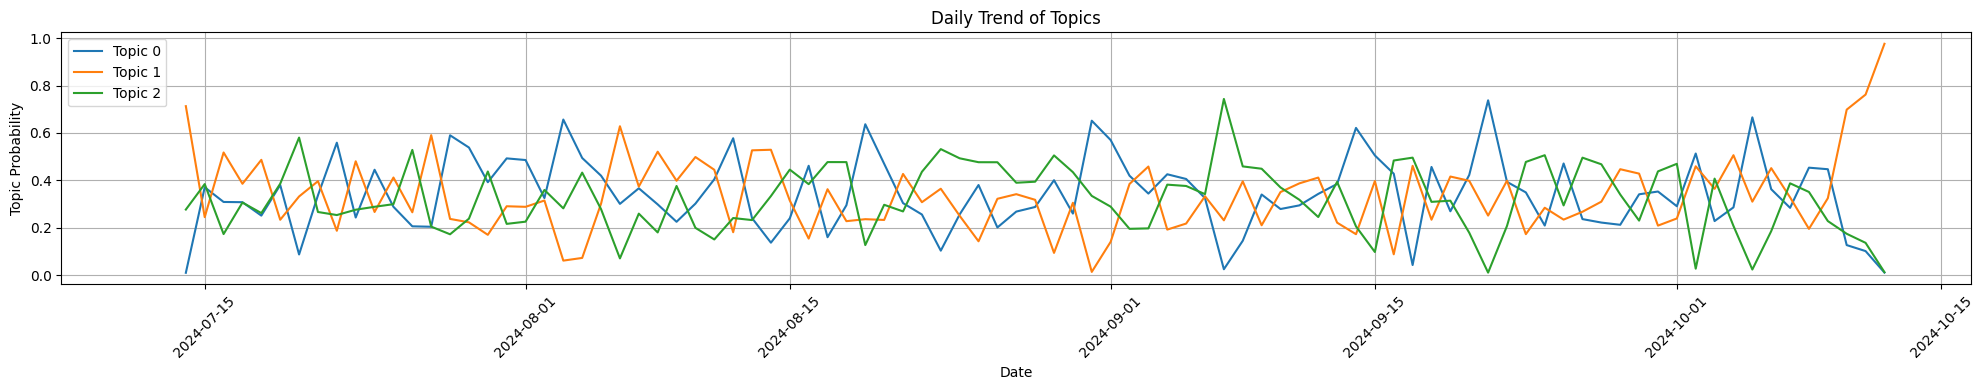

In [20]:
# prompt : 일자별로 각 토픽의 추세를 보여주는 시각화

# Assuming 'df' is your DataFrame with '일자' as index and topic probabilities
# Example: df['topic_0_prob'], df['topic_1_prob'], df['topic_2_prob']

# Resample the data to daily frequency (if needed)
# Select only numeric columns for calculating the mean

import matplotlib.pyplot as plt
import numpy as np

df_daily = df.select_dtypes(include=np.number).resample('D').mean()

plt.figure(figsize=(20, 4))

# Plotting each topic's trend
plt.plot(df_daily.index, df_daily['topic_0_prob'], label='Topic 0')
plt.plot(df_daily.index, df_daily['topic_1_prob'], label='Topic 1')
plt.plot(df_daily.index, df_daily['topic_2_prob'], label='Topic 2')


plt.xlabel('Date')
plt.ylabel('Topic Probability')
plt.title('Daily Trend of Topics')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 감성분석

### <font color ='red'> **(Start) 본문에서 직접 gensim을 적용하면 어떨까?**

In [ ]:
df = pd.read_pickle(path).sample(frac=0.1)
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,일자,본문
24689,2024-09-03,‘한강 보이는 공공주택’으로 유명한 서울 동작구 수방사 부지가 다음 달 분양한다. ...
329,2024-09-03,[이데일리 신민준 기자] SCL사이언스(246960)가 신규 경영진을 선임했다. S...


In [ ]:
# Corpus를 documents로
documents_new = df['본문'].tolist()
processed_docs_new = [preprocess(doc) for doc in documents_new[:3]]
processed_docs_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['한강',
  '보이는',
  '공공주택',
  '으로',
  '유명한',
  '서울',
  '동작구',
  '수방사',
  '부지가',
  '다음',
  '분양한다',
  '인천',
  '계양',
  '블록',
  '사업장',
  '신도시',
  '최초로',
  '주인을',
  '찾는다',
  '다만',
  '분양가는',
  '사전청약',
  '추정',
  '분양가보다',
  '높아질',
  '전망이다',
  '본청약이',
  '지연되는',
  '동안',
  '주변',
  '시세와',
  '공사비가',
  '오르고',
  '오염토',
  '정화비용',
  '예상하지',
  '못한',
  '비용이',
  '발생한',
  '탓이다',
  '국토교통부에',
  '따르면',
  '동작구'],
 ['이데일리',
  '신민준',
  '기자',
  'scl사이언스',
  '신규',
  '경영진을',
  '선임했다',
  'scl사이언스가',
  '인공지능',
  'ai',
  '의료',
  '디지털',
  '헬스케어',
  '디지털',
  '바이오플랫폼',
  '사업을',
  '확대하기',
  '위한',
  '취지로',
  '풀이된다',
  'scl사이언스',
  'ci',
  '이미지',
  'scl사이언스',
  'scl사이언스는',
  '서울시',
  '영등포구에서',
  '열린',
  '임시주주총회에서',
  '백세연',
  '사내이사',
  '최정균',
  '사외이사를',
  '신규'],
 ['화순전남대학교병원',
  '첨단정밀의료산업화지원센터는',
  '최근',
  '이산친환경연구원과',
  '신약소재물질',
  '사업화를',
  '위한',
  '업무협약을',
  '체결했다고',
  '밝혔다',
  '사진',
  '기관은',
  '이번',
  '협약을',
  '통해',
  '신약소재물질',
  '천연물신약',
  '뉴트라슈티컬',
  '발굴',
  '공동',
  '연구개발',
  '사업화',
  '연구',
  '인적자원의',
  '교류',
  '비임상시험'

In [ ]:
# prompt: nouns_from_processed_docs에서 1개 글자는 제외

# Assuming 'processed_docs_new' is defined as in the provided code.
# If not, make sure to define processed_docs_new before running this code.

okt = Okt()

nouns_from_processed_docs = []
for doc in processed_docs_new:
  # Join the tokens in the list 'doc' into a single string
  doc_string = " ".join(doc)
  nouns = okt.nouns(doc_string)
  # Filter out single-character nouns
  filtered_nouns = [noun for noun in nouns if len(noun) > 1]
  nouns_from_processed_docs.append(filtered_nouns)

nouns_from_processed_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['한강',
  '주택',
  '서울',
  '동작구',
  '수방사',
  '부지',
  '다음',
  '분양',
  '인천',
  '계양',
  '블록',
  '사업',
  '신도시',
  '최초',
  '주인',
  '다만',
  '분양',
  '사전',
  '청약',
  '추정',
  '분양',
  '전망',
  '청약',
  '지연',
  '동안',
  '주변',
  '시세',
  '사비',
  '오염',
  '정화',
  '비용',
  '예상',
  '비용',
  '발생',
  '국토교통부',
  '동작구'],
 ['이데일리',
  '신민준',
  '기자',
  '사이언스',
  '신규',
  '영진',
  '선임',
  '사이언스',
  '인공',
  '지능',
  '의료',
  '디지털',
  '스케',
  '디지털',
  '바이오',
  '플랫폼',
  '사업',
  '확대',
  '취지',
  '풀이',
  '사이언스',
  '이미지',
  '사이언스',
  '사이언스',
  '서울시',
  '영등포구',
  '임시',
  '주주총회',
  '사내',
  '이사',
  '최정',
  '사외이사',
  '신규'],
 ['화순',
  '전남대학교병원',
  '첨단',
  '정밀',
  '의료',
  '산업화',
  '지원',
  '센터',
  '최근',
  '이산',
  '친환경',
  '연구원',
  '신약',
  '소재',
  '물질',
  '사업',
  '업무',
  '협약',
  '체결',
  '사진',
  '기관',
  '이번',
  '협약',
  '통해',
  '신약',
  '소재',
  '물질',
  '천연물',
  '신약',
  '뉴트라슈티컬',
  '발굴',
  '공동',
  '연구개발',
  '사업',
  '연구',
  '인적자원',
  '교류',
  '임상시험',
  '대한',
  '협력',
  '화순',
  '전남대',
  '병원',
  '첨단',
  '정밀',
  '의료',
  '산업화']]

### <font color ='red'> **(End) 본문에서 직접 gensim을 적용하면 어떨까? 별 차이가 없는 듯**